### Import Library

In [4]:
import opendatasets as od
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

od.download('https://www.kaggle.com/datasets/aleksandrglotov/car-prices-poland')
df = pd.read_csv('car-prices-poland/Car_Prices_Poland_Kaggle.csv')

Skipping, found downloaded files in "./car-prices-poland" (use force=True to force download)


In [5]:
df.shape

(117927, 11)

In [6]:
df.head(7)

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
5,5,opel,combo,gen-d-2011,2017,121203,1598,Diesel,Warszawa,Mazowieckie,51900
6,6,opel,combo,gen-d-2011,2017,119965,1248,Diesel,Wrocław,Dolnośląskie,44700


#### Drop columns

In [7]:
# deleting unnecessary columns
df.drop(columns= ['Unnamed: 0','generation_name'],inplace = True)

In [8]:
# missing value control
df.isnull().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [10]:
# duplicated value control
df.duplicated().sum() 

6761

In [11]:
# delete drop duplicate values
df.drop_duplicates(inplace=True) 

In [12]:
df.shape 

(111166, 9)

In [101]:
# mark column unique values
df['mark'].value_counts()

mark
audi             10873
bmw              10729
volkswagen       10468
opel             10014
ford              9375
renault           6789
mercedes-benz     6782
skoda             5722
peugeot           4981
toyota            4976
hyundai           3912
kia               3558
volvo             3340
nissan            3051
mazda             2808
seat              2797
fiat              2773
citroen           2712
honda             2062
mini              1076
mitsubishi        1076
alfa-romeo         686
chevrolet          606
Name: count, dtype: int64

In [14]:
# mean price by mark from low to high
df.groupby('mark')['price'].mean().sort_values(ascending=True)

mark
citroen           33999.633850
opel              36367.216597
fiat              38196.479986
seat              39505.400787
chevrolet         40359.453795
renault           44726.374577
peugeot           46305.361976
honda             47623.768671
mitsubishi        48950.999071
nissan            49266.230416
ford              50741.506560
hyundai           53521.120143
toyota            53973.644494
mazda             56388.569801
kia               58181.175942
skoda             61279.840091
volkswagen        61870.866546
alfa-romeo        65794.752187
mini              71536.833643
volvo             92472.250599
audi             105392.749011
bmw              121183.286793
mercedes-benz    135598.585963
Name: price, dtype: float64

In [103]:
df.sort_values(by = 'price',ascending= False) # price göre sıralama yapıyor

,mark,model,year,mileage,vol_engine,fuel,city,province,price
61836,mercedes-benz,s-klasa,2017,400,5980,Gasoline,Janki,Mazowieckie,2399900
61646,mercedes-benz,s-klasa,2019,12000,6233,Gasoline,Poznań,Wielkopolskie,1966770
61810,mercedes-benz,s-klasa,2018,21,5980,Gasoline,Warszawa,Mazowieckie,1550000
55530,mercedes-benz,amg-gt,2019,28500,3982,Gasoline,Poznań,Wielkopolskie,1368341
55562,mercedes-benz,amg-gt,2020,16000,3982,Gasoline,Pruszcz Gdański,Pomorskie,1100000
...,...,...,...,...,...,...,...,...,...
39776,volkswagen,passat,1998,220000,1781,Gasoline,Pniewy,Wielkopolskie,1250
36305,volkswagen,golf,1999,190321,1390,Gasoline,Tarnowskie Góry,Śląskie,1000
71653,toyota,aygo,2019,17123,998,Gasoline,Warblino,Pomorskie,900
26367,bmw,seria-3,2004,260000,1995,Diesel,Iława,Warmińsko-mazurskie,900


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


In [16]:
numeric_cols = df.select_dtypes(include=['int64','float'])
corelation_matrix = numeric_cols.corr()
corelation_matrix

,year,mileage,vol_engine,price
year,1.000000,-0.724111,-0.157331,0.591387
mileage,-0.724111,1.000000,0.202139,-0.537943
vol_engine,-0.157331,0.202139,1.000000,0.308294
price,0.591387,-0.537943,0.308294,1.000000


Text(0.5, 1.0, 'Corelation Matrix')

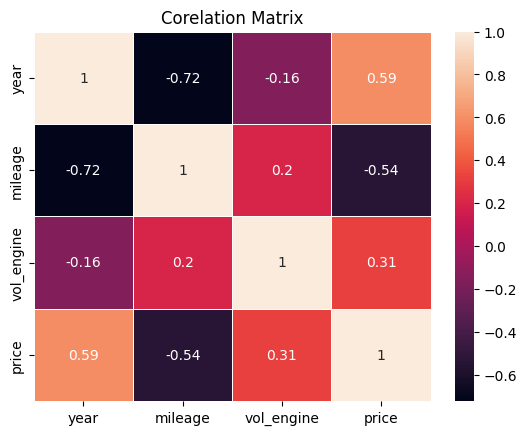

In [17]:
sns.heatmap(corelation_matrix, annot = True,linewidths=0.5)
plt.title('Corelation Matrix')


Text(0, 0.5, 'Sum sales')

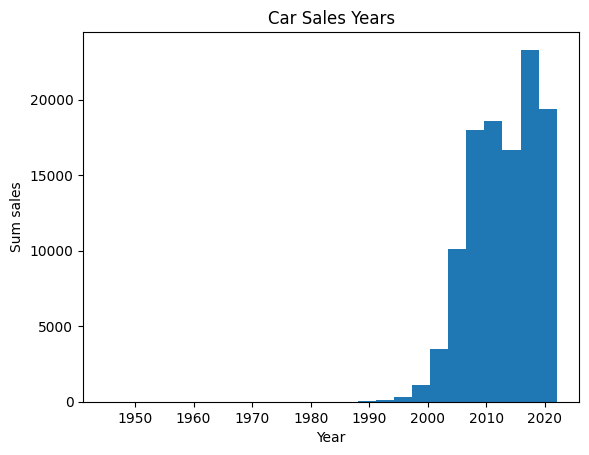

In [19]:
df['year'].plot(kind= 'hist',bins = 25)
plt.title('Car Sales Years')
plt.xlabel('Year')
plt.ylabel('Sum sales')

Text(0, 0.5, 'price')

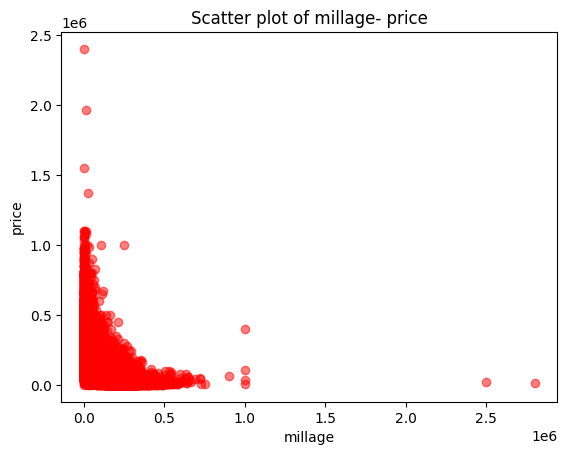

In [149]:
# Scatter Plot
plt.scatter(df['mileage'],df['price'],c='r',alpha=0.5)
plt.title('Scatter plot of millage- price')
plt.xlabel('millage')
plt.ylabel('price')

Text(0.5, 1.0, 'Mean price by mark bar plot')

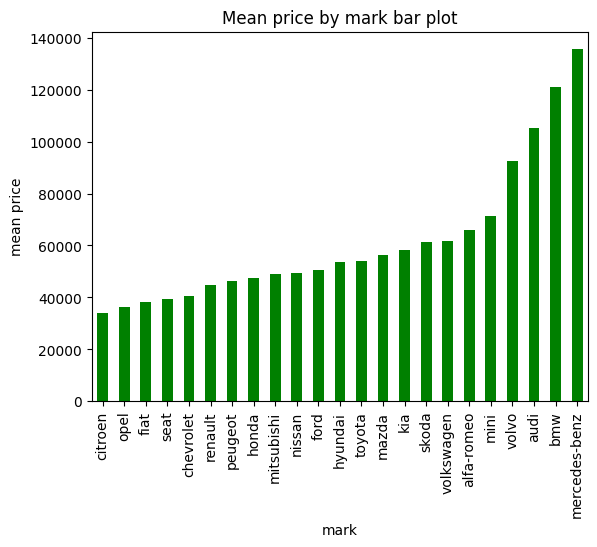

In [20]:
# Average price mean by ALL mark
mean_price_by_mark = df.groupby('mark')['price'].mean().sort_values()
mean_price_by_mark.plot(kind = 'bar',color = 'green')
plt.xlabel('mark')
plt.ylabel('mean price')
plt.title('Mean price by mark bar plot')


Text(0.5, 1.0, 'Mean price by mark bar plot')

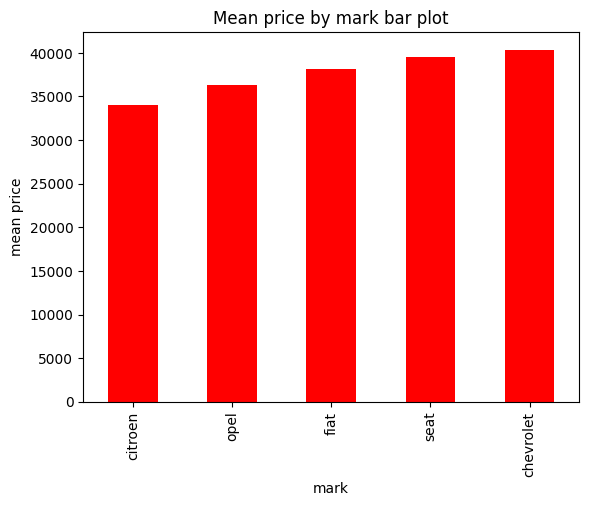

In [154]:
# Average price mean by top five mark
mean_price_by_mark = df.groupby('mark')['price'].mean().sort_values().head(5)
mean_price_by_mark.plot(kind = 'bar',color = 'red')
plt.xlabel('mark')
plt.ylabel('mean price')
plt.title('Mean price by mark bar plot')

Text(0, 0.5, 'Frequency')

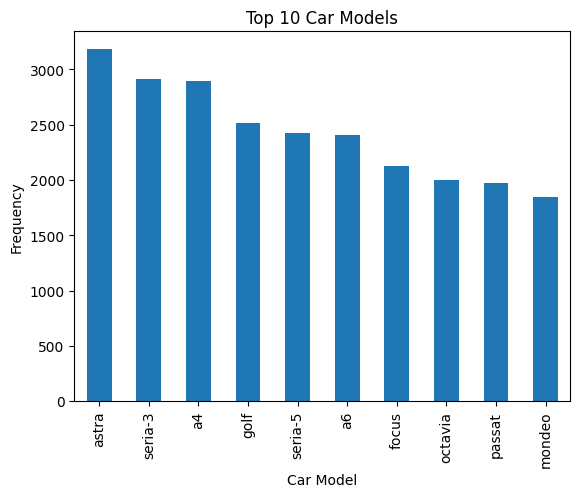

In [21]:

# Top 10 Car Models Sales 
top_10_models_sell= df['model'].value_counts().head(10) # en çok satan araba modelleri
top_10_models_sell.plot(kind = 'bar')
plt.title('Top 10 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Scatter plot of Vol engine - price')

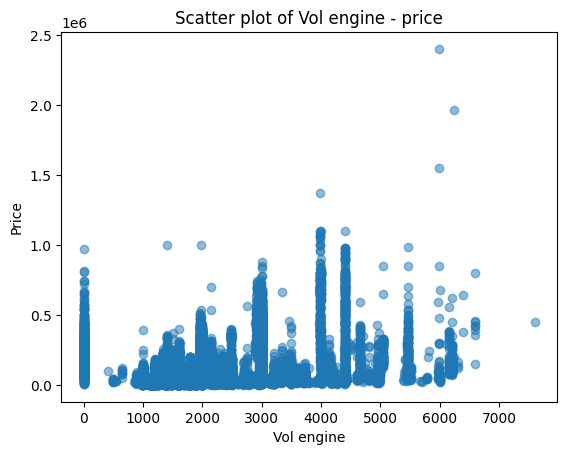

In [22]:
# Scatter plot of Vol engine - price
plt.scatter(df['vol_engine'],df['price'],alpha=0.5)
plt.xlabel('Vol engine')
plt.ylabel('Price')
plt.title('Scatter plot of Vol engine - price')

Text(0.5, 0, 'Mileage')

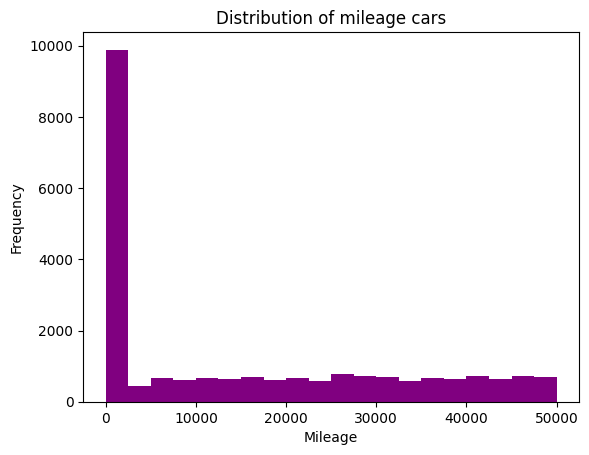

In [23]:
 # Distribution of mileage cars
df[df['mileage']<50000]['mileage'].plot.hist(bins = 20,color = 'purple')
plt.title('Distribution of mileage cars')
plt.xlabel('Mileage')

Text(0, 0.5, 'Count car')

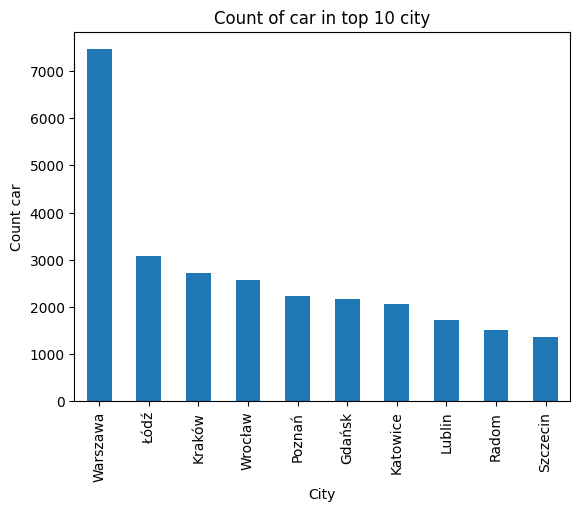

In [24]:
# Count of car in each city
city_counts = df['city'].value_counts().sort_values(ascending=False).head(10) 
city_counts.plot(kind = 'bar')
plt.title('Count of car in top 10 city')
plt.xlabel('City')
plt.ylabel('Count car')

In [25]:
fuel_avg_price = df.groupby('fuel')['price'].mean().sort_values()
fuel_avg_price

fuel
LPG          27307.425921
CNG          30796.476190
Gasoline     65157.168699
Diesel       70620.197740
Hybrid      159289.210872
Electric    191076.428951
Name: price, dtype: float64

In [26]:
mileage_median_by_year = df.groupby('year')['mileage'].median()
mileage_median_by_year

year
1945     68000.0
1952      1000.0
1964     24255.0
1965     97000.0
1966     66666.0
1967     94500.0
1968    123456.0
1969     97967.0
1970     21125.5
1971     47000.0
1972     20046.5
1973     59000.0
1974     99999.0
1978    188896.0
1981    200000.0
1983    132000.0
1985    215000.0
1986    377500.0
1987    354050.5
1988    220000.0
1989    171950.0
1990    234000.0
1991    181962.0
1992    201000.0
1993    190207.0
1994    223000.0
1995    234790.0
1996    243500.0
1997    243000.0
1998    240750.0
1999    246400.0
2000    233430.0
2001    238000.0
2002    222000.0
2003    225000.0
2004    224000.0
2005    217900.0
2006    212000.0
2007    210000.0
2008    200000.0
2009    189000.0
2010    187000.0
2011    183000.0
2012    172000.0
2013    160000.0
2014    145538.0
2015    129332.0
2016    110492.5
2017     97324.0
2018     78000.0
2019     43061.0
2020     17310.0
2021         5.0
2022         5.0
Name: mileage, dtype: float64

In [27]:
max_engine_size_by_mark_fuel = df.groupby(['mark','fuel'])['vol_engine'].max()
max_engine_size_by_mark_fuel

mark        fuel    
alfa-romeo  Diesel      2387
            Gasoline    3195
            LPG         3195
audi        CNG         1984
            Diesel      4200
                        ... 
volvo       Diesel      2401
            Electric       0
            Gasoline    4415
            Hybrid      2400
            LPG         4414
Name: vol_engine, Length: 114, dtype: int64

In [28]:
car_count_by_province = df.groupby('province')['mark'].count()
car_count_by_province

province
(                               1
Berlin                          2
Dolnośląskie                 8370
Kujawsko-pomorskie           5027
Lubelskie                    4488
Lubuskie                     2562
Mazowieckie                 20871
Małopolskie                  9242
Moravian-Silesian Region       34
Niedersachsen                   1
Nordrhein-Westfalen             1
Opolskie                     1963
Podkarpackie                 3385
Podlaskie                    2026
Pomorskie                    7199
Trenczyn                        1
Warmińsko-mazurskie          2766
Wiedeń                          1
Wielkopolskie               13272
Zachodniopomorskie           3737
Łódzkie                      7384
Śląskie                     15677
Świętokrzyskie               3156
Name: mark, dtype: int64

In [29]:
avg_price_by_mark_model= df.groupby(['mark','model'])['price'].mean()
avg_price_by_mark_model

mark        model    
alfa-romeo  147            6929.531250
            159           17017.614583
            giulia       184298.511494
            giulietta     39697.661458
            mito          20376.885417
                             ...      
volvo       v90          175483.628272
            xc-40        173552.386076
            xc-60        135156.664921
            xc-70         49096.718750
            xc-90        160643.361272
Name: price, Length: 328, dtype: float64

In [30]:
car_count_by_year = df.groupby('year')['mark'].count()
car_count_by_year

year
1945       1
1952       1
1964       2
1965       5
1966       7
1967       4
1968       3
1969       2
1970       8
1971       3
1972       2
1973       3
1974       1
1978       2
1981       3
1983       1
1985       3
1986       2
1987       2
1988       7
1989      10
1990      18
1991      26
1992      25
1993      30
1994      53
1995      59
1996      95
1997     144
1998     252
1999     387
2000     477
2001     724
2002    1130
2003    1624
2004    2447
2005    3292
2006    4390
2007    5365
2008    6152
2009    6482
2010    6151
2011    6365
2012    6042
2013    5282
2014    5603
2015    5769
2016    6662
2017    8451
2018    8198
2019    4911
2020    3317
2021    9321
2022    1850
Name: mark, dtype: int64

In [31]:
avg_milage_by_mark_province = df.groupby(['mark','province'])['mileage'].mean()
avg_milage_by_mark_province

mark        province          
alfa-romeo  Dolnośląskie          177537.688889
            Kujawsko-pomorskie    130814.485714
            Lubelskie             163404.125000
            Lubuskie              118556.833333
            Mazowieckie           138224.543307
                                      ...      
volvo       Wielkopolskie         126621.385321
            Zachodniopomorskie    153020.114504
            Łódzkie               167987.152174
            Śląskie               130180.455224
            Świętokrzyskie        201238.611111
Name: mileage, Length: 378, dtype: float64

In [32]:
min_price_by_province_fuel = df.groupby(['province','fuel'])['price'].min()
min_price_by_province_fuel

province        fuel    
(               Diesel      62900
Berlin          Diesel      16000
                Gasoline    26999
Dolnośląskie    Diesel       1290
                Electric    41500
                            ...  
Świętokrzyskie  Diesel       2300
                Electric    36898
                Gasoline      500
                Hybrid      33900
                LPG          2500
Name: price, Length: 102, dtype: int64

Text(0.5, 1.0, 'Average Price by car mark')

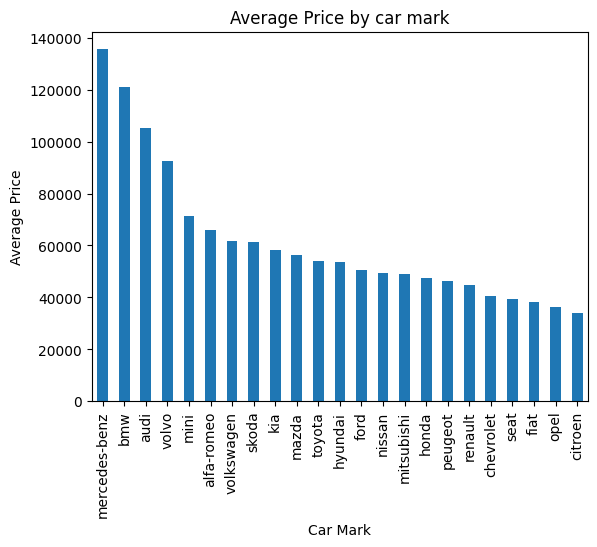

In [33]:
df.groupby('mark')['price'].mean().sort_values(ascending=False).plot(kind = 'bar')
plt.xlabel('Car Mark')
plt.ylabel('Average Price')
plt.title('Average Price by car mark')

Text(0.5, 1.0, 'Maximum Engine Size by fuel')

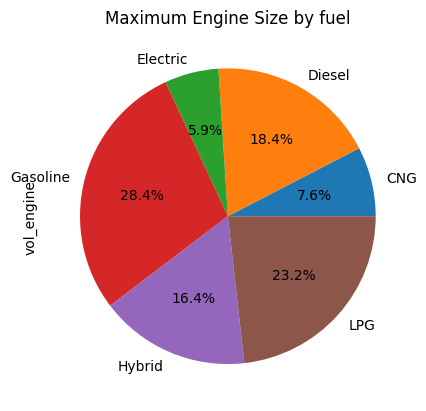

In [34]:
df.groupby('fuel')['vol_engine'].max().plot(kind = 'pie',autopct = '%1.1f%%') #yakıt türüne göre max motor boyutu
plt.title('Maximum Engine Size by fuel')

## ML into

In [35]:
X = df.iloc[:,:-1]
X

,mark,model,year,mileage,vol_engine,fuel,city,province
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie
...,...,...,...,...,...,...,...,...
117250,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie
117251,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie
117252,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie
117253,volvo,xc-90,2016,189020,1969,Gasoline,Sionna,Mazowieckie


In [36]:
y = df.iloc[:,-1]
y

0          35900
1          78501
2          27000
3          30800
4          35900
           ...  
117250    229900
117251    135000
117252    154500
117253    130000
117254    126000
Name: price, Length: 111166, dtype: int64

### feature engineer part 1

In [37]:
 
X.drop(['model','city','province'],axis= 1 ,inplace=True)

In [38]:
X

,mark,year,mileage,vol_engine,fuel
0,opel,2015,139568,1248,Diesel
1,opel,2018,31991,1499,Diesel
2,opel,2015,278437,1598,Diesel
3,opel,2016,47600,1248,Diesel
4,opel,2014,103000,1400,CNG
...,...,...,...,...,...
117250,volvo,2017,51000,1969,Diesel
117251,volvo,2016,83500,1969,Gasoline
117252,volvo,2017,174000,1969,Diesel
117253,volvo,2016,189020,1969,Gasoline


In [39]:
# Labelencoder
from sklearn.preprocessing import LabelEncoder

lr = LabelEncoder()
X['mark'] = lr.fit_transform(X['mark'])
X['fuel'] = lr.fit_transform(X['fuel'])

In [40]:
X

,mark,year,mileage,vol_engine,fuel
0,15,2015,139568,1248,1
1,15,2018,31991,1499,1
2,15,2015,278437,1598,1
3,15,2016,47600,1248,1
4,15,2014,103000,1400,0
...,...,...,...,...,...
117250,22,2017,51000,1969,1
117251,22,2016,83500,1969,3
117252,22,2017,174000,1969,1
117253,22,2016,189020,1969,3


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)

In [43]:
# import regression metric 
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

def modelresult(predict):
    print(f'Mean absolute error on model is {mean_absolute_error(y_test,predict)}')
    print(f'Mean squared error on model is {mean_squared_error(y_test,predict)}')


In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(scaled_x_train,y_train)
predictlr = reg.predict(scaled_x_test)

In [46]:
modelresult(predictlr)

Mean absolute error on model is 32404.00834870777
Mean squared error on model is 3018617309.8705335


In [47]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svrmodel = SVR()
param_gridsvr ={'C':[0.001,0.01,0.1,0.5],
                'kernel':['linear','rbf','poly'],
               'gamma':['scale','auto'],
               'degree':[2,3,4,5]}
gridsvr = GridSearchCV(svrmodel,param_gridsvr)
#gridsvr.fit(scaled_x_train,y_train)

In [48]:
svrmodel.fit(scaled_x_train,y_train)

SVR()

In [49]:
predict_svr = svrmodel.predict(scaled_x_test)

In [50]:
modelresult(predict_svr)

Mean absolute error on model is 41867.664067187034
Mean squared error on model is 7182113434.717777


In [51]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor().fit(scaled_x_train,y_train)

In [52]:
predict_random = rfmodel.predict(scaled_x_test)
modelresult(predict_random)

Mean absolute error on model is 14457.527310772246
Mean squared error on model is 1016094839.3527966
